### 중심경향도

- 중심경향도(중심화 경향)는 데이터를 분석할 때, 값들이 중심으로 얼마나 모이는지를 측정하는 통계 개념
- 이는 데이터 분포의 중심을 나타내는 대표값들을 통해 설명된다.
- 사례 : 중심경향도는 평균 (Mean), 중앙값 (Median), 그리고 최빈값 (Mode) 등

## 1.  random data 중심경향도 기본 이해

### 1-1 라이브러리

In [3]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib import rc

# Windows 기본 한글 폰트 설정
rc('font', family='Malgun Gothic')  # '맑은 고딕' 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


### 1-2 random data 형성

In [4]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 회사 A의 판매 건수라고 가정
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


### 1-3 데이터 시각화

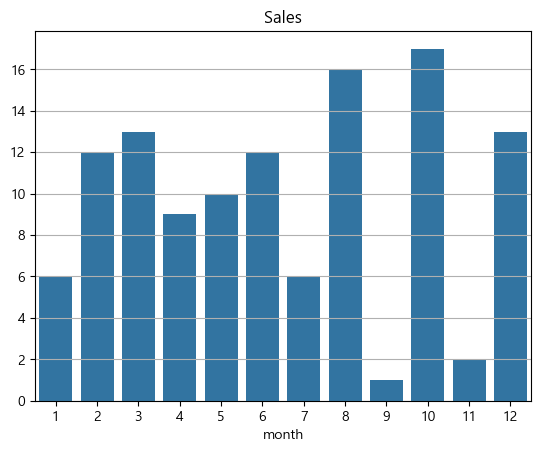

In [5]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('Sales')
plt.xlabel('month')
plt.grid(axis='y')
plt.show()

### 1-4 중심경향도 

#### 1) 산술평균

데이터의 평균값을 계산

(전체 합) / (전체 데이터 개수)

In [6]:
print(X.sum()/len(X))

print(X.mean())

# 만약, 소수점을 출력하지 않는 경우 (round 반올림 함수 이용)

print(round(X.mean()))

9.75
9.75
10


#### 2) 기하평균

변화율 도출하기 (월별 건수가 얼마의 비율로 변화되었는지)

In [7]:
rate = []
for i in range(len(X)-1):
    rate.append((( (X[i+1]) / X[i] )))

for i in range(11):
    print(f'{i+1}월 대비 {i+2}월의 판매건수 비율은 약 {rate[i]*100 : .2f}% 입니다.')

1월 대비 2월의 판매건수 비율은 약  200.00% 입니다.
2월 대비 3월의 판매건수 비율은 약  108.33% 입니다.
3월 대비 4월의 판매건수 비율은 약  69.23% 입니다.
4월 대비 5월의 판매건수 비율은 약  111.11% 입니다.
5월 대비 6월의 판매건수 비율은 약  120.00% 입니다.
6월 대비 7월의 판매건수 비율은 약  50.00% 입니다.
7월 대비 8월의 판매건수 비율은 약  266.67% 입니다.
8월 대비 9월의 판매건수 비율은 약  6.25% 입니다.
9월 대비 10월의 판매건수 비율은 약  1700.00% 입니다.
10월 대비 11월의 판매건수 비율은 약  11.76% 입니다.
11월 대비 12월의 판매건수 비율은 약  650.00% 입니다.


In [8]:
# 변수 설정 (simple data X는 동일)
# 곱셈에 대한 항등원 1
mulScores = 1 

# 항목들로 반복 (rate의 모든 항목을 곱셈하기 위한 코드)
for item in rate:
    mulScores *= item
print(f'변화율의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(rate)) 
print(f'해당 데이터의 기하평균(=평균 증가율) 값은 약 {geometricMean1*100}% 입니다.')

변화율의 모든 값을 곱하면 2.166666666666666가 됩니다.
해당 데이터의 기하평균(=평균 증가율) 값은 약 107.28192428296298% 입니다.


#### 3) 가중평균

In [9]:
# 가중치도 랜덤으로 설정합니다. (각 의미는 매출이 아닌 순이익의 비율로 가정해봅니다.)
np.random.seed(2022)
weight = np.random.randint(1, 5, 12)

print('가중치 :',weight)
print('판매 건수 :',X)
print('판매 건수의 순이익에 대한 가중평균 값 :', sum(X * weight)/sum(weight))

가중치 : [2 1 2 1 2 2 1 4 1 3 1 1]
판매 건수 : [ 6 12 13  9 10 12  6 16  1 17  2 13]
판매 건수의 순이익에 대한 가중평균 값 : 11.428571428571429


#### 4) 절사평균

In [10]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정 (양 극단 5%의 데이터 제외)
cut = 0.05
n = len(X)
tem_data = sorted(X)
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data]}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {np.mean(tem_data[cut_data : -cut_data])}입니다.')

5.0% 비율로 절사한 후 data는 [2, 6, 6, 9, 10, 12, 12, 13, 13, 16]입니다.
5.0% 비율로 절사한 후 data의 평균은 9.9입니다.


#### 5) 중위값 도출

In [11]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(X)
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

# np.median을 사용
print(np.median(X))

[1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
6
11.0
11.0


## 2. 데이터 사례

In [12]:
import statistics

# 예시 데이터
data = [50, 60, 70, 80, 90, 90]

# 평균 (Mean)
mean = statistics.mean(data)
print(f"평균 (Mean): {mean}")

# 중앙값 (Median)
median = statistics.median(data)
print(f"중앙값 (Median): {median}")

# 최빈값 (Mode)
try:
    mode = statistics.mode(data)
    print(f"최빈값 (Mode): {mode}")
except statistics.StatisticsError:
    print("최빈값이 없습니다 (모든 값이 동일한 빈도로 나타남).")


평균 (Mean): 73.33333333333333
중앙값 (Median): 75.0
최빈값 (Mode): 90


## 3. 삼성전자 주가 데이터

### 3-1 라이브러리

In [19]:
import yfinance

# 야후 파이낸스를 이용하여 주가 정보를 다운받습니다.
samsung_price = yfinance.download('005930.KS', '2024-01-01', '2024-11-30')
samsung_price

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2024-01-02 00:00:00+00:00,78447.882812,79600.0,79800.0,78200.0,78200.0,17142847
2024-01-03 00:00:00+00:00,75885.523438,77000.0,78800.0,77000.0,78500.0,21753644
2024-01-04 00:00:00+00:00,75491.304688,76600.0,77300.0,76100.0,76100.0,15324439
2024-01-05 00:00:00+00:00,75491.304688,76600.0,77100.0,76400.0,76700.0,11304316
2024-01-08 00:00:00+00:00,75392.757812,76500.0,77500.0,76400.0,77000.0,11088724
...,...,...,...,...,...,...
2024-11-25 00:00:00+00:00,57900.000000,57900.0,57900.0,56700.0,57400.0,36237325
2024-11-26 00:00:00+00:00,58300.000000,58300.0,58900.0,57500.0,57900.0,23209405


### 3-2 EDA

In [39]:
print(samsung_price.head())

Price                         Adj Close     Close      High       Low  \
Ticker                        005930.KS 005930.KS 005930.KS 005930.KS   
Date                                                                    
2024-01-02 00:00:00+00:00  78447.882812   79600.0   79800.0   78200.0   
2024-01-03 00:00:00+00:00  75885.523438   77000.0   78800.0   77000.0   
2024-01-04 00:00:00+00:00  75491.304688   76600.0   77300.0   76100.0   
2024-01-05 00:00:00+00:00  75491.304688   76600.0   77100.0   76400.0   
2024-01-08 00:00:00+00:00  75392.757812   76500.0   77500.0   76400.0   

Price                          Open    Volume Close_Change_Rate  
Ticker                    005930.KS 005930.KS                    
Date                                                             
2024-01-02 00:00:00+00:00   78200.0  17142847               NaN  
2024-01-03 00:00:00+00:00   78500.0  21753644         -0.032663  
2024-01-04 00:00:00+00:00   76100.0  15324439         -0.005195  
2024-01-05 00:00:00

In [40]:
 #기초 통계량 계산
basic_statistics = samsung_price.describe()
print("\n기초 통계량:")
print(basic_statistics)

# 개별 기초 통계량 예시
mean_close = samsung_price['Close'].mean()
median_close = samsung_price['Close'].median()
variance_close = samsung_price['Close'].var()
std_dev_close = samsung_price['Close'].std()

print("\n개별 기초 통계량:")
print(f"종가 평균 (Mean): {mean_close}")
print(f"종가 중앙값 (Median): {median_close}")
print(f"종가 분산 (Variance): {variance_close}")
print(f"종가 표준편차 (Standard Deviation): {std_dev_close}")


기초 통계량:
Price      Adj Close         Close          High          Low          Open  \
Ticker     005930.KS     005930.KS     005930.KS    005930.KS     005930.KS   
count     224.000000    224.000000    224.000000    224.00000    224.000000   
mean    72558.424125  73172.767857  74065.625000  72509.37500  73340.625000   
std      8765.463436   9004.523996   8917.123476   8923.41363   8990.169098   
min     49900.000000  49900.000000  51800.000000  49900.00000  50200.000000   
25%     69360.824219  69750.000000  71175.000000  69600.00000  70025.000000   
50%     74111.578125  75050.000000  75850.000000  74150.00000  75000.000000   
75%     78450.855469  79375.000000  80100.000000  78625.00000  79525.000000   
max     87310.109375  87800.000000  88800.000000  87100.00000  88500.000000   

Price         Volume Close_Change_Rate  
Ticker     005930.KS                    
count   2.240000e+02        223.000000  
mean    2.190439e+07         -0.001511  
std     9.596227e+06          0.0205

### 3-3 종가(CLOSE) 변화율 계산 및 통계량

In [22]:
import yfinance as yf
import pandas as pd

# 삼성전자 주가 데이터 다운로드
samsung_price = yf.download('005930.KS', start='2024-01-01', end='2024-11-30')

# Close 열의 변화율 계산
samsung_price['Close_Change_Rate'] = samsung_price['Close'].pct_change()

# 변화율의 기초 통계량 계산
change_rate_statistics = samsung_price['Close_Change_Rate'].describe()
print("\n종가 변화율의 기초 통계량:")
print(change_rate_statistics)

# 개별 기초 통계량
mean_change_rate = samsung_price['Close_Change_Rate'].mean()
median_change_rate = samsung_price['Close_Change_Rate'].median()
std_change_rate = samsung_price['Close_Change_Rate'].std()

print("\n개별 기초 통계량:")
print(f"변화율 평균 (Mean): {mean_change_rate}")
print(f"변화율 중앙값 (Median): {median_change_rate}")
print(f"변화율 표준편차 (Standard Deviation): {std_change_rate}")


[*********************100%***********************]  1 of 1 completed


종가 변화율의 기초 통계량:
count    223.000000
mean      -0.001511
std        0.020568
min       -0.103015
25%       -0.014022
50%       -0.001344
75%        0.008006
max        0.072144
Name: Close_Change_Rate, dtype: float64

개별 기초 통계량:
변화율 평균 (Mean): -0.0015107989575659083
변화율 중앙값 (Median): -0.0013440860215053752
변화율 표준편차 (Standard Deviation): 0.020568064369570496


### 3-4 종가 변화율 중심경향도

- 산술평균 (mean()): 데이터의 단순 평균입니다.
- 기하평균:모든 값의 곱의 N제곱근에서 1을 뺀 값으로 계산됩니다. 기하평균=[(∏(1+𝑋𝑖))^1/𝑁] −1
- 절사평균 (trim_mean):상하위 𝑘%의 데이터를 제거한 후 계산한 평균입니다. 여기서는 상하위 10%를 제거합니다.

#### 1) 계산 사례

In [41]:
import yfinance as yf
import numpy as np
from scipy.stats import trim_mean

# 삼성전자 주가 데이터 다운로드
samsung_price = yf.download('005930.KS', start='2024-01-01', end='2024-11-30')

# Close 열의 변화율 계산
samsung_price['Close_Change_Rate'] = samsung_price['Close'].pct_change()

# NaN 제거 (첫 번째 변화율은 계산되지 않으므로 제거)
change_rate = samsung_price['Close_Change_Rate'].dropna()

# 산술평균
arithmetic_mean = change_rate.mean()

# 기하평균
geometric_mean = (np.prod(1 + change_rate) ** (1 / len(change_rate))) - 1

# 절사평균 (상하위 10% 값 제거)
truncated_mean = trim_mean(change_rate, 0.1)
# 중위값 계산
median_change_rate = change_rate.median()

# 결과 출력
print("변화율의 산술평균 (Arithmetic Mean):", arithmetic_mean)
print("변화율의 기하평균 (Geometric Mean):", geometric_mean)
print("변화율의 절사평균 (Trimmed Mean, 10%):", truncated_mean)

print("변화율의 중위값 (Median):", median_change_rate)


[*********************100%***********************]  1 of 1 completed

변화율의 산술평균 (Arithmetic Mean): -0.0015107989575659083
변화율의 기하평균 (Geometric Mean): -0.0017219828779007074
변화율의 절사평균 (Trimmed Mean, 10%): -0.0021229677451471292
변화율의 중위값 (Median): -0.0013440860215053752


#### 2) for 문 활용 사례 (중앙값 추가)

- for문을 사용하여 값을 계산할 때 다음과 같은 편리함과 이점이 있습니다.
- 새로운 분석을 추가하거나 기존 분석 방법을 수정할 때, 반복문을 사용하면 단일 구조에서 관리할 수 있습니다.
- 반복문은 데이터 분석을 확장하는 데 용이합니다. 새로운 함수나 조건이 추가되더라도 기존 구조를 수정하지 않고 간단히 추가할 수 있습니다.

In [49]:
import yfinance as yf
import numpy as np
from scipy.stats import trim_mean

# 삼성전자 주가 데이터 다운로드
samsung_price = yf.download('005930.KS', start='2024-01-01', end='2024-11-30')

# Close 열의 변화율 계산
samsung_price['Close_Change_Rate'] = samsung_price['Close'].pct_change()

# NaN 제거 (첫 번째 변화율은 계산되지 않으므로 제거)
change_rate = samsung_price['Close_Change_Rate'].dropna()

# 분석 함수 정의
def arithmetic_mean(data):
    return data.mean()

def geometric_mean(data):
    return (np.prod(1 + data) ** (1 / len(data))) - 1

def trimmed_mean(data, proportion_to_cut=0.1):
    return trim_mean(data, proportion_to_cut)

def median(data):
    return data.median()

# 분석 방법을 리스트로 정의
methods = [
    ("산술평균 (Arithmetic Mean)", arithmetic_mean),
    ("기하평균 (Geometric Mean)", geometric_mean),
    ("절사평균 (Trimmed Mean, 10%)", lambda x: trimmed_mean(x, 0.1)),
    ("중위값 (Median)", median),
]

# 반복문을 사용하여 결과 출력
for name, method in methods:
    result = method(change_rate)
    print(f"{name}: {result}")


[*********************100%***********************]  1 of 1 completed

산술평균 (Arithmetic Mean): -0.0015107989575659083
기하평균 (Geometric Mean): -0.0017219828779007074
절사평균 (Trimmed Mean, 10%): -0.0021229677451471292
중위값 (Median): -0.0013440860215053752


#### 2) for 문 활용 사례 (분산 추가)

In [47]:
import yfinance as yf
import numpy as np
from scipy.stats import trim_mean

# 삼성전자 주가 데이터 다운로드
samsung_price = yf.download('005930.KS', start='2024-01-01', end='2024-11-30')

# Close 열의 변화율 계산
samsung_price['Close_Change_Rate'] = samsung_price['Close'].pct_change()

# NaN 제거 (첫 번째 변화율은 계산되지 않으므로 제거)
change_rate = samsung_price['Close_Change_Rate'].dropna()

# 분석 함수 정의
def arithmetic_mean(data):
    return data.mean()

def geometric_mean(data):
    return (np.prod(1 + data) ** (1 / len(data))) - 1

def trimmed_mean(data, proportion_to_cut=0.1):
    return trim_mean(data, proportion_to_cut)

def median(data):
    return data.median()

def variance(data):
    return data.var()

# 분석 방법을 리스트로 정의
methods = [
    ("산술평균 (Arithmetic Mean)", arithmetic_mean),
    ("기하평균 (Geometric Mean)", geometric_mean),
    ("절사평균 (Trimmed Mean, 10%)", lambda x: trimmed_mean(x, 0.1)),
    ("중위값 (Median)", median),
    ("분산 (Variance)", variance),
]

# 반복문을 사용하여 결과 출력
for name, method in methods:
    result = method(change_rate)
    print(f"{name}: {result}")


[*********************100%***********************]  1 of 1 completed

산술평균 (Arithmetic Mean): -0.0015107989575659083
기하평균 (Geometric Mean): -0.0017219828779007074
절사평균 (Trimmed Mean, 10%): -0.0021229677451471292
중위값 (Median): -0.0013440860215053752
분산 (Variance): 0.00042304527191079535
